Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [12]:
library('tidymodels')

The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [13]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [14]:
diabetes_train |> glimpse()

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 4, 3, 8, 1, 5, 3, 6, 10, 4, 11, 3, 7, 7, 7…
$ Glucose                  <dbl> 85, 110, 126, 99, 97, 109, 88, 92, 122, 103, …
$ BloodPressure            <dbl> 66, 92, 88, 84, 66, 75, 58, 92, 78, 60, 76, 6…
$ SkinThickness            <dbl> 29, 0, 41, 0, 15, 26, 11, 0, 31, 33, 0, 25, 0…
$ Insulin                  <dbl> 0, 0, 235, 0, 140, 0, 54, 0, 0, 192, 0, 70, 0…
$ BMI                      <dbl> 26.6, 37.6, 39.3, 35.4, 23.2, 36.0, 24.8, 19.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.191, 0.704, 0.388, 0.487, 0.546, 0.2…
$ Age                      <dbl> 31, 30, 27, 50, 22, 60, 22, 28, 45, 33, 35, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** The target variable for a logisitic regression model should be something can be categorized or should fall into a yes or no category. For this dataset, the outcome would be the presence of diabetes no (0) or yes (1). 

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

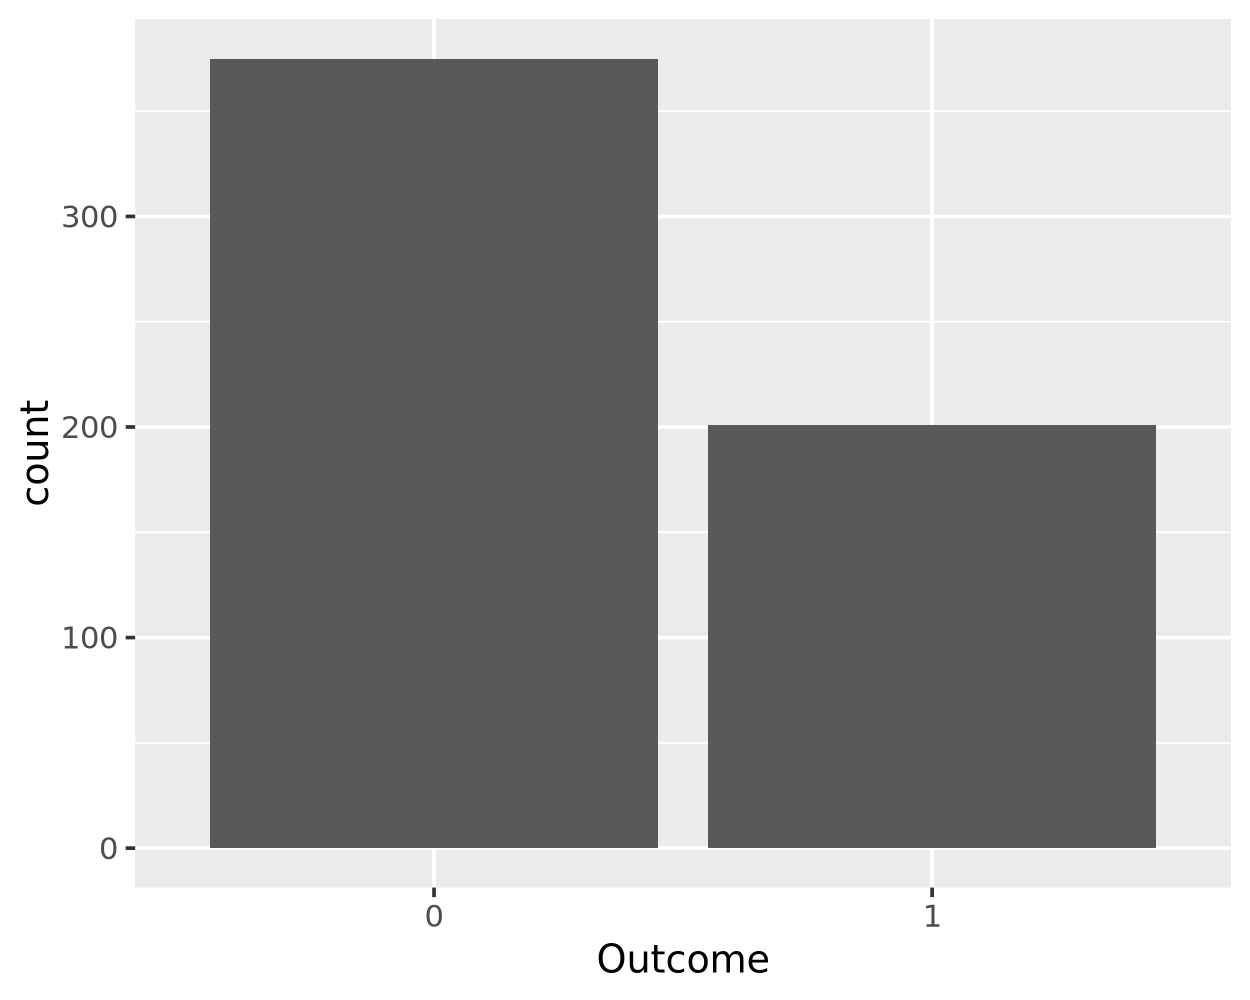

In [15]:
ggplot(diabetes_train, aes(x=Outcome)) +
    geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** No, we do not have equal counts of each outcome. There are almost double more no's to diabetes compared to yeses. 

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [16]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,110.0
0,BMI,37.6
0,Glucose,126.0
0,BMI,39.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

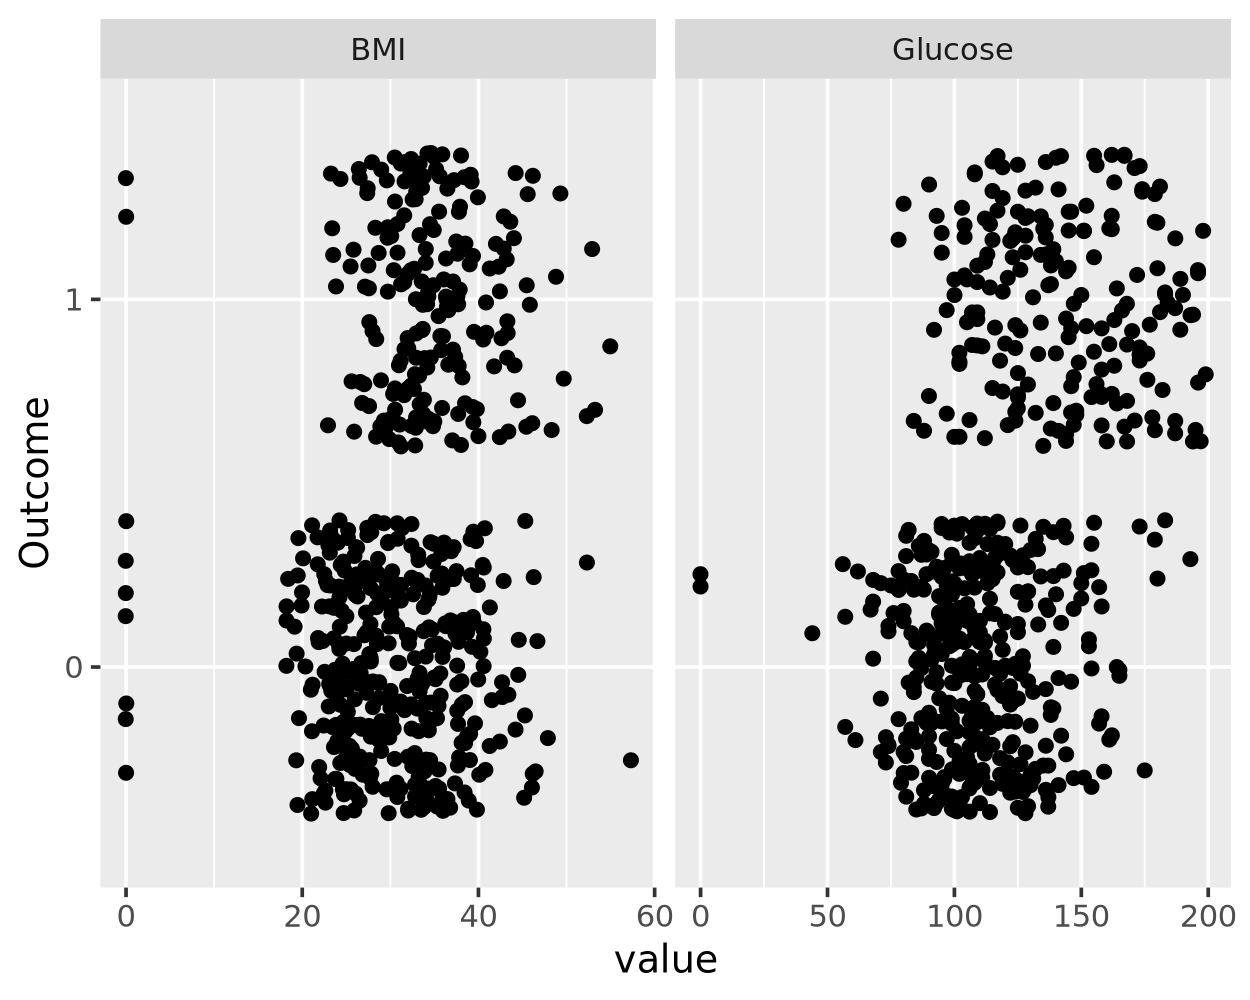

In [32]:
ggplot(plot_df, aes(x=value, y=Outcome)) + 
    geom_jitter() +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** It looks like the x-ticks don't automatically scale with the values, so the BMI points look very clumped since the scale is too wide

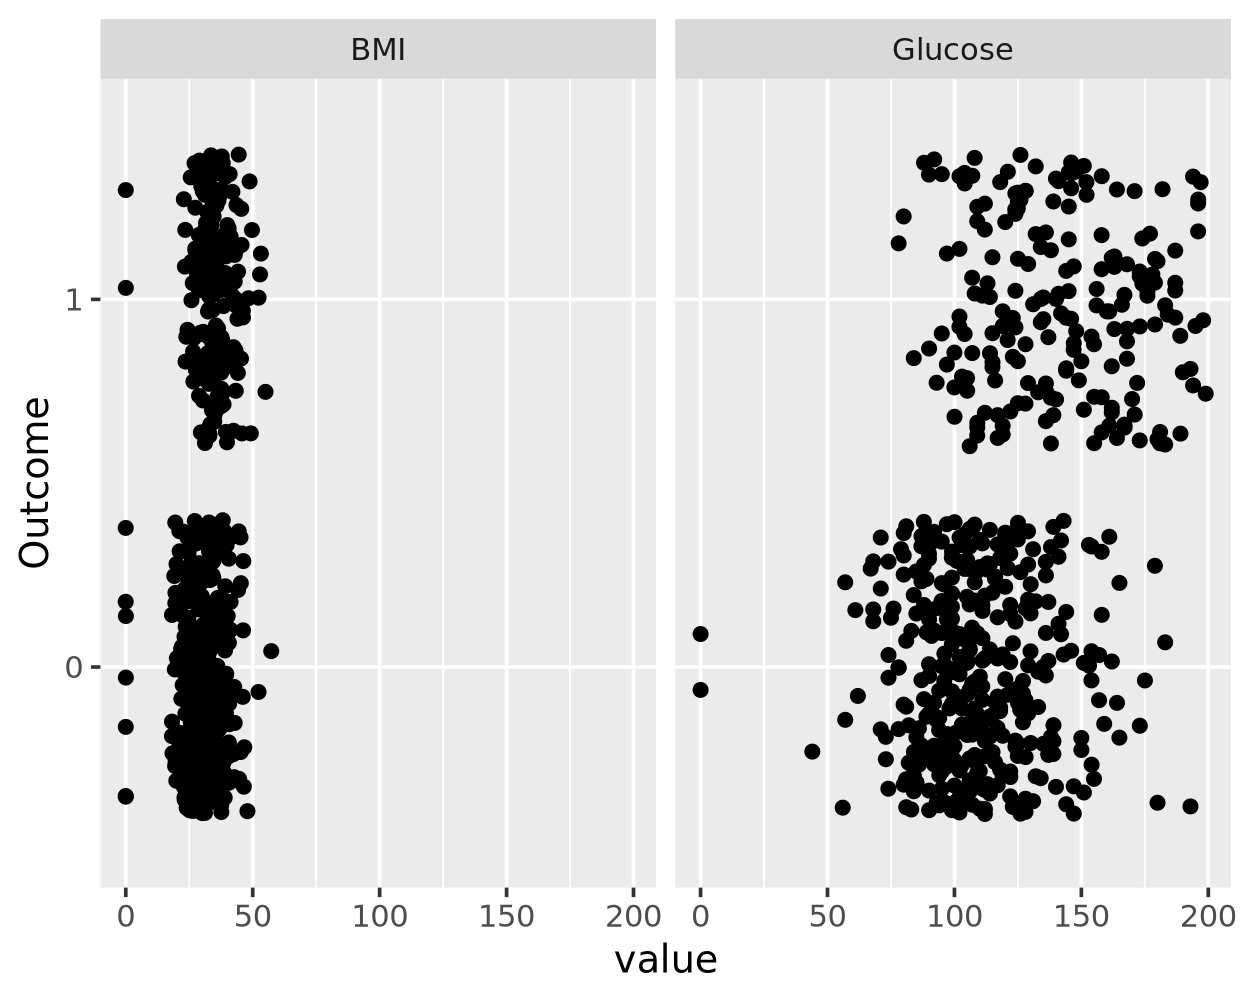

In [33]:
ggplot(plot_df, aes(x=value, y=Outcome)) + 
    geom_jitter() +
    facet_wrap(~name, ncol = 2)

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [34]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data=diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [36]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [37]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  28
         1  18  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**
125 individuals actually had diabetes.
107/125 of those who correctly predicted by the model to have diabetes.
28 individuals were predicted to have diabetes but did not have diabetes.